# Reservas de Hotel


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import mannwhitneyu


df = pd.read_csv('processed.csv')

### Porcentagem de cancelamento


In [2]:
print(df['is_canceled'].value_counts(normalize=True).to_string(header=False))


0    0.628218
1    0.371782


- 0: Não cancelado
- 1: Cancelado


### Tipo do hotel


Indica o tipo do hotel a qual a reserva se refere, pode assumir os valores 'Resort Hotel' e 'City Hotel'


In [3]:
print(df['hotel'].value_counts(normalize=True).to_string(header=False))

City Hotel      0.666608
Resort Hotel    0.333392


### Data de chegada


In [4]:
print('Mais antiga:' ,df["arrival_date"].min())
print('Mais recente:' ,df["arrival_date"].max())


Mais antiga: 2015-07-01
Mais recente: 2017-08-31


### Data de Reserva


In [5]:
print('Mais antiga:' ,df["reservation_status_date"].min())
print('Mais recente:' ,df["reservation_status_date"].max())

Mais antiga: 2014-10-17
Mais recente: 2017-09-14


### Gráfico: Meses de chegada


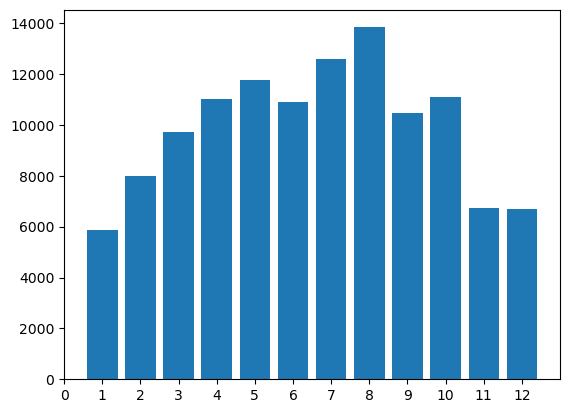

In [6]:
counts = np.bincount(df['arrival_date_month'])
fig, ax = plt.subplots()
ax.bar(range(0,13), counts, width=0.8, align='center')
ax.set(xticks=range(0,13), xlim=[0,13])
plt.show()

O hotel recebe mais pessoas no meio do ano,
sendo agosto o mês de maior movimento, em uma distribuição similar a normal.


### Total guests


In [7]:
df[['adults','children','babies']].describe(percentiles=[.05,.25,.75,.95,.99])


,adults,children,babies
count,118731.000000,118731.000000,118731.000000
mean,1.861064,0.104354,0.007959
std,0.574700,0.399434,0.097448
min,0.000000,0.000000,0.000000
5%,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000
95%,3.000000,1.000000,0.000000
99%,3.000000,2.000000,0.000000


Individualmente, cada um desses valores não costuma ultrapassar de 2 ou 3, mas existem casos que extrapolam esses valores.


In [8]:
print(df['babies'].value_counts().sort_index().to_string(header=False))

0     117817
1        898
2         14
9          1
10         1


In [9]:
print(df['children'].value_counts().to_string(header=False))

0     110152
1       4852
2       3650
3         76
10         1


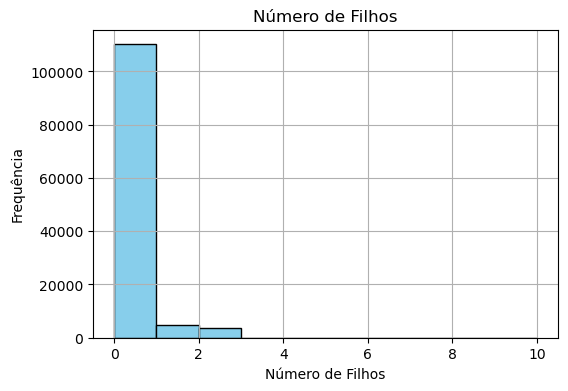

In [10]:
plt.figure(figsize=(6, 4))
plt.hist(df['children'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Número de Filhos')
plt.ylabel('Frequência')
plt.title('Número de Filhos')
plt.grid(True)
plt.show()

In [11]:
print(df['adults'].value_counts().sort_index().to_string(header=False))

0       223
1     22735
2     89497
3      6198
4        62
5         2
6         1
10        1
20        2
26        5
27        2
40        1
50        1
55        1


Ao invés de lidar com os hospedes de forma separada em tipos, decidimos somar o número de adultos, crianças e bebês da reserva.


In [12]:
print(df['total_guests'].describe(percentiles=[.05,.25,.75,.95,.99]).to_string(header=False))

count    118731.000000
mean          1.973377
std           0.718543
min           1.000000
5%            1.000000
25%           2.000000
50%           2.000000
75%           2.000000
95%           3.000000
99%           4.000000
max          55.000000


### Pedidos Especiais

Ex.: Cama de solteiro ou piso superior


In [13]:
df["total_of_special_requests"].sum()

67891

### Country


In [14]:
countries = (df.loc[df["is_canceled"] == 0, "country"].value_counts().sort_values(ascending=False)
             .to_frame(name='Guests') .reset_index().rename(columns={'index': 'Country'}))
total_hospedes = countries["Guests"].sum()
countries["Percent"] = round(countries["Guests"] / total_hospedes * 100, 2)
print ("País\tHóspedes\tPorcentagem")
print(countries.to_string(index=False,header=False))

País	Hóspedes	Porcentagem
PRT 20977 28.12
GBR  9667 12.96
FRA  8468 11.35
ESP  6383  8.56
DEU  6067  8.13
IRL  2542  3.41
ITA  2428  3.26
BEL  1868  2.50
NLD  1716  2.30
USA  1592  2.13
BRA  1392  1.87
CHE  1298  1.74
AUT  1033  1.38
 CN  1025  1.37
SWE   793  1.06
POL   703  0.94
CHN   537  0.72
ISR   500  0.67
NOR   426  0.57
RUS   391  0.52
FIN   377  0.51
ROU   366  0.49
DNK   326  0.44
AUS   319  0.43
LUX   177  0.24
JPN   169  0.23
ARG   160  0.21
AGO   157  0.21
HUN   153  0.21
MAR   150  0.20
TUR   146  0.20
CZE   134  0.18
IND   116  0.16
SRB    98  0.13
GRC    93  0.12
DZA    82  0.11
KOR    78  0.10
HRV    75  0.10
MEX    75  0.10
LTU    74  0.10
NZL    68  0.09
EST    65  0.09
BGR    63  0.08
IRN    59  0.08
ISL    53  0.07
ZAF    49  0.07
CHL    49  0.07
UKR    48  0.06
COL    48  0.06
MOZ    48  0.06
LVA    46  0.06
THA    41  0.05
SVN    41  0.05
SVK    41  0.05
CYP    40  0.05
TWN    37  0.05
MYS    25  0.03
URY    23  0.03
PER    23  0.03
SGP    22  0.03
LBN    22  0.0

In [15]:

pie = px.pie(countries, values="Guests", names="Country", title="Países dos Hóspedes", template="seaborn")
pie.update_traces(textposition="inside", textinfo="value+percent+label")
pie.show()

### Adr

Soma de todos os gastos divididos pelo número de dias hospedados.

Média por hospedes:


In [16]:
print(df['pay_per_night_mean'].describe().to_string(header=False))

count    118731.000000
mean         55.035645
std          29.064968
min           0.000000
25%          37.400000
50%          49.500000
75%          66.000000
max        2700.000000


### Segmento de mercado


In [20]:
segmentos=df["market_segment"].value_counts()
pie = px.pie(segmentos, values=segmentos.values, names=segmentos.index,
             title="Reservas por segmento de mercado", template="seaborn")
pie.update_traces(rotation=-90, textinfo="percent+label")
pie.show()

### Análise Exploratória Multivariada


No conjunto de dado, os hoteis estão separados em dois tipos, primeiro vamos verificar se existe uma diferença entre eles.


In [36]:
city = df[df['hotel'] == 'City Hotel']
resort = df[df['hotel'] == 'Resort Hotel']

print('Média de preços por hotel:')
print('City Hotel: {:.2f}€'.format(city['pay_per_night_mean'].mean()))
print('Resort Hotel: {:.2f}€'.format(resort['pay_per_night_mean'].mean()))

Média de preços por hotel:
City Hotel: 58.41€
Resort Hotel: 48.29€


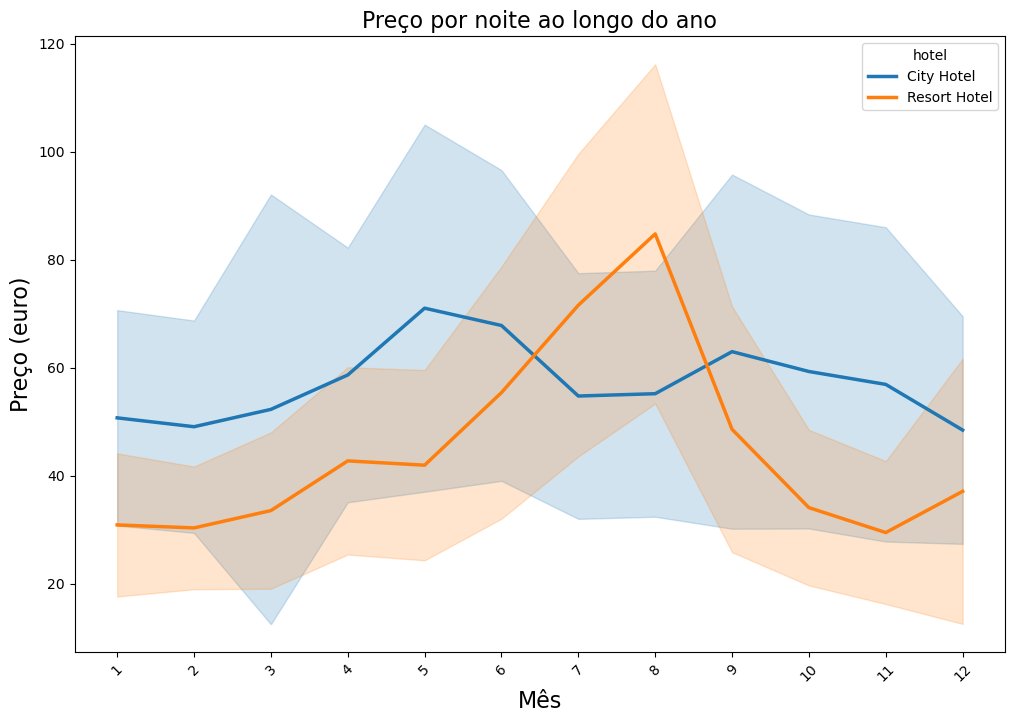

In [50]:
prices_monthly = df[["hotel", "arrival_date_month", "pay_per_night_mean"]].sort_values("arrival_date_month")


plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="pay_per_night_mean", hue="hotel", data=prices_monthly,
 hue_order = ["City Hotel", "Resort Hotel"], errorbar="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Preço por noite ao longo do ano", fontsize=16)
plt.xlabel("Mês", fontsize=16)
plt.xticks(np.arange(1, 13), rotation=45)
plt.ylabel("Preço (euro)", fontsize=16)
plt.show()

Podemos perceber que os hoteis resort costumam ter seu pico de preço no mês de agosto, quando os hoteis 'city' estão com uma baixa de preço.


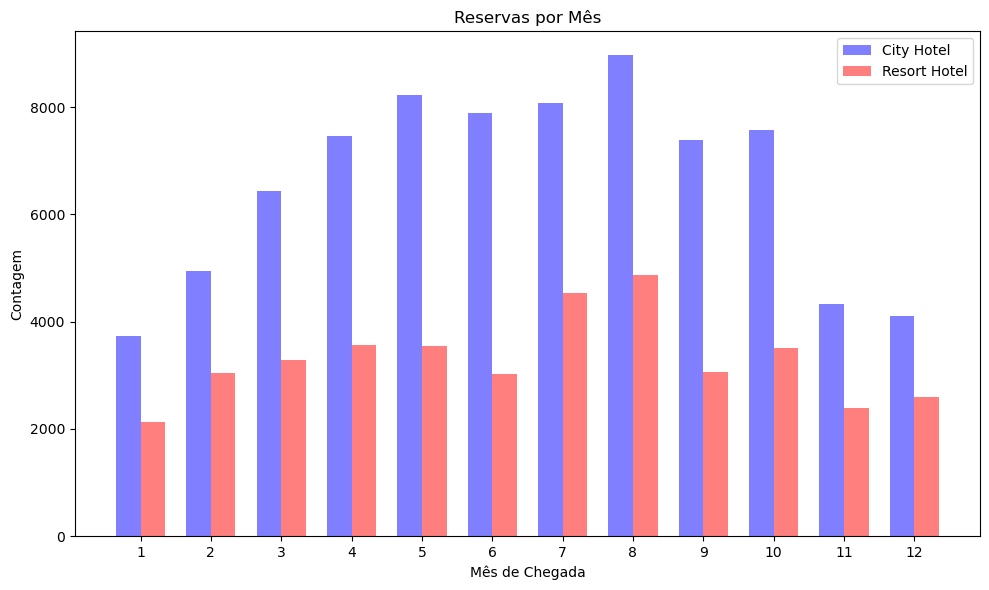

In [57]:
grouped_city = city['arrival_date_month'].value_counts().sort_index()
grouped_resort = resort['arrival_date_month'].value_counts().sort_index()

bar_width = 0.35
index = grouped_city.index

plt.figure(figsize=(10,6))

plt.bar(index, grouped_city, bar_width, color='b', alpha=0.5, label='City Hotel')
plt.bar(index + bar_width, grouped_resort, bar_width, color='r', alpha=0.5, label='Resort Hotel')

plt.xlabel('Mês de Chegada')
plt.ylabel('Contagem')
plt.title('Reservas por Mês')
plt.xticks(index + bar_width / 2, index)
plt.legend()

plt.tight_layout()
plt.show()

Já no número de reservas que os hoteis recebem, parece haver um mesmo comportamento, levando em consideração o conjunto possui um número de tipos city e resort desigual, apesar disso, decidimos trabalhar com resort e city separadamente por acreditar haver uma diferença nos tipos de negócio.


### Testes de Hipótese

**Taxa de diária**: As médias do preço das diárias para o City Hotel não possui diferenças significativas para o Resort Hotel?

- Hipótese nula (H0): A média para os dois tipos de hotéis é a mesma.
- Hipótese alternativa (H1): A média para os dois tipos de hotéis é diferente.


In [93]:
city_sample = city.sample(n=len(resort.dropna()), replace=False)
stat, p = mannwhitneyu(resort['pay_per_night_mean'].dropna(), city_sample['pay_per_night_mean'])

print(f'stat = {stat:.4f}, p = {p:.4f}')
msg = 'iguais: H0' if p > 0.05 else 'diferentes: H1'
print(f'A média dos grupos são {msg}')

stat = 449957252.0000, p = 0.0000
A média dos grupos são diferentes: H1


Ou seja, os preços praticados nas duas situações sofrem dinâmicas, além de valores diferentes, o que pode-se verificar no gráfico acima.

#### Resort

**Taxa de cancelamento**: A taxa de cancelamento é maior em agosto para o Resort Hotel?

- Hipótese nula (H0): A taxa de cancelamento em agosto é igual à taxa de cancelamento nos outros meses.
- Hipótese alternativa (H1): A taxa de cancelamento em agosto é maior do que a taxa de cancelamento nos outros meses.


In [97]:
cancellation_rate = resort.groupby('arrival_date_month')['is_canceled'].mean()
cancellation_august = cancellation_rate[8]
cancellation_others = cancellation_rate[cancellation_rate.index != 8]
stat, p = mannwhitneyu([cancellation_august], cancellation_others, alternative='greater')

print(f'stat = {stat:.4f}, p = {p:.4f}')
msg1 = 'igual à' if p > 0.05 else 'maior do que a'
msg2 = '0' if p > 0.05 else '1'
print(f'A taxa de cancelamento em agosto é {msg1} taxa de cancelamento nos outros meses: H{msg2}')


stat = 11.0000, p = 0.0833
A taxa de cancelamento em agosto é igual à taxa de cancelamento nos outros meses: H0


Ou seja, pelo teste aplicado, para o caso de resorts, não podemos afirmar que o cancelamento seja derivado pela época.

#### City


In [100]:
cancellation_rate = city.groupby('arrival_date_month')['is_canceled'].mean()
cancellation_august = cancellation_rate[8]
cancellation_others = cancellation_rate[cancellation_rate.index != 8]
stat, p = mannwhitneyu([cancellation_august], cancellation_others, alternative='greater')

print(f'stat = {stat:.4f}, p = {p:.4f}')
msg1 = 'igual à' if p > 0.05 else 'maior do que a'
msg2 = '0' if p > 0.05 else '1'
print(f'A taxa de cancelamento em agosto é {msg1} taxa de cancelamento nos outros meses: H{msg2}')


stat = 4.0000, p = 0.6667
A taxa de cancelamento em agosto é igual à taxa de cancelamento nos outros meses: H0


A mesma coisa pelos hotéis city, não podemos afirmar que a época influencia nos cancelamentos.
